Librerias 

In [34]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv("../data/spotify_dataset.csv")

In [36]:
df.shape

(114000, 21)

In [37]:
pd.set_option("display.max_columns", None)  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [38]:
df["energy"].value_counts

<bound method IndexOpsMixin.value_counts of 0         0.4610
1         0.1660
2         0.3590
3         0.0596
4         0.4430
           ...  
113995    0.2350
113996    0.1170
113997    0.3290
113998    0.5060
113999    0.4870
Name: energy, Length: 114000, dtype: float64>

In [39]:
num_valores_unicos = df['track_id'].nunique()


num_filas = len(df)
es_unico = (num_valores_unicos == num_filas)

print(f"Número total de registros: {num_filas}")
print(f"Número de 'track id' únicos: {num_valores_unicos}")

if es_unico:
    print("es COMPLETAMENTE ÚNICO.")
else:
    print("El 'track id' NO es único.")
    
    ids_duplicados = df[df.duplicated(subset=['track_id'], keep=False)]['track_id'].value_counts()
    print("\nConteo de 'track id' duplicados:")
    print(ids_duplicados[ids_duplicados > 1])

Número total de registros: 114000
Número de 'track id' únicos: 89741
El 'track id' NO es único.

Conteo de 'track id' duplicados:
track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
4WJTKbNJQ41zXnb84jSWaj    7
6bzWr3EpSEolVwlbLk58il    7
                         ..
7k9GuJYLp2AzqokyEdwEw2    2
1EzrEOXmMH3G43AXT1y7pA    2
6Vc5wAMmXdKIAM7WUoEb7N    2
01MVOl9KtVTNfFiBU9I7dc    2
4qPNDBW1i3p13qLCt0Ki3A    2
Name: count, Length: 16641, dtype: int64


In [40]:

duplicados_por_id = df[df.duplicated(subset=['track_id'], keep=False)].sort_values(by='track_id')

print(f"Total de registros con 'track_id' repetido: {len(duplicados_por_id)}")

Total de registros con 'track_id' repetido: 40900


In [41]:
conteo_nulos = df.isnull().sum()
total_registros = len(df)
porcentaje_nulos = (conteo_nulos / total_registros) * 100


reporte_nulos = pd.DataFrame({
    'Total de Nulos': conteo_nulos,
    'Porcentaje de Nulos': porcentaje_nulos.round(2) 
})


columnas_con_nulos = reporte_nulos[reporte_nulos['Total de Nulos'] > 0].sort_values(
    by='Porcentaje de Nulos', ascending=False
)


print(" REPORTE DE VALORES NULOS POR COLUMNA")
print("="*50)

if columnas_con_nulos.empty:
    print("¡No se encontraron valores nulos en el dataset! 🎉")
else:
    print(columnas_con_nulos)

 REPORTE DE VALORES NULOS POR COLUMNA
            Total de Nulos  Porcentaje de Nulos
artists                  1                  0.0
album_name               1                  0.0
track_name               1                  0.0


In [42]:
valores_no_nulos = df['explicit'].dropna().unique()

valores_esperados = {True, False}

valores_actuales = set(valores_no_nulos)

es_valido = valores_actuales.issubset(valores_esperados)

print(f"Valores únicos (no nulos) encontrados en 'explicit': {valores_actuales}")

if es_valido:
    print("\n'explicit' es válida (solo contiene True y False).")
else:
    print("\n La columna 'explicit' contiene valores no esperados.")
    valores_invalidos = valores_actuales - valores_esperados
    print(f"Valores problemáticos (diferentes a True/False): {valores_invalidos}")


conteo_nulos = df['explicit'].isnull().sum()
porcentaje_nulos = (conteo_nulos / len(df)) * 100

print(f"\nTotal de registros: {len(df)}")
print(f"Total de valores nulos (NaN/None): {conteo_nulos}")
print(f"Porcentaje de nulos en la columna: {porcentaje_nulos:.2f}%")

Valores únicos (no nulos) encontrados en 'explicit': {np.False_, np.True_}

'explicit' es válida (solo contiene True y False).

Total de registros: 114000
Total de valores nulos (NaN/None): 0
Porcentaje de nulos en la columna: 0.00%


In [43]:
LIMITE_MIN = 0.0
LIMITE_MAX = 1.0

df_no_nulos = df.dropna(subset=['danceability'])


fuera_de_rango = (df_no_nulos['danceability'] < LIMITE_MIN) | (df_no_nulos['danceability'] > LIMITE_MAX)


conteo_fuera_de_rango = fuera_de_rango.sum()


print("VERIFICACIÓN DE RANGO PARA LA COLUMNA 'DANCEABILITY'")


if conteo_fuera_de_rango == 0:
    print(f"Todos los valores no nulos de 'danceability' están en el rango [{LIMITE_MIN}, {LIMITE_MAX}].")
else:
    print(f" Se encontraron {conteo_fuera_de_rango} valores fuera del rango.")
    print("\nMuestra de filas con 'danceability' problemático:")

    print(df_no_nulos[fuera_de_rango].head())


conteo_nulos = df['danceability'].isnull().sum()
if conteo_nulos > 0:
    print(f"\nNota: Se encontraron {conteo_nulos} valores nulos (NaN) en 'danceability', los cuales no se incluyeron en esta verificación de rango.")

VERIFICACIÓN DE RANGO PARA LA COLUMNA 'DANCEABILITY'
Todos los valores no nulos de 'danceability' están en el rango [0.0, 1.0].


In [44]:

LIMITE_MIN = 0.0
LIMITE_MAX = 1.0


df_no_nulos = df.dropna(subset=['energy'])


fuera_de_rango = (df_no_nulos['energy'] < LIMITE_MIN) | (df_no_nulos['energy'] > LIMITE_MAX)
conteo_fuera_de_rango = fuera_de_rango.sum()


print("VERIFICACIÓN DE RANGO PARA LA COLUMNA 'ENERGY'")


if conteo_fuera_de_rango == 0:
    print(f"Todos los valores no nulos de 'energy' están en el rango [{LIMITE_MIN}, {LIMITE_MAX}].")
else:
    print(f"Se encontraron {conteo_fuera_de_rango} valores fuera del rango.")
    print("\nMuestra de filas con 'energy' problemático:")
    print(df_no_nulos[fuera_de_rango].head())



conteo_nulos = df['energy'].isnull().sum()
total_registros = len(df)
porcentaje_nulos = (conteo_nulos / total_registros) * 100

print("REPORTE DE VALORES NULOS PARA 'ENERGY'")
print(f"Total de registros: {total_registros}")
print(f"Total de valores nulos (NaN/None): {conteo_nulos}")
print(f"Porcentaje de nulos en la columna: {porcentaje_nulos:.2f}%")

VERIFICACIÓN DE RANGO PARA LA COLUMNA 'ENERGY'
Todos los valores no nulos de 'energy' están en el rango [0.0, 1.0].
REPORTE DE VALORES NULOS PARA 'ENERGY'
Total de registros: 114000
Total de valores nulos (NaN/None): 0
Porcentaje de nulos en la columna: 0.00%


In [45]:
COLUMNA_GENERO = 'track_genre' 
ids_duplicados = df[df.duplicated(subset=['track_id'], keep=False)]


conteo_generos_unicos = ids_duplicados.groupby('track_id')[COLUMNA_GENERO].nunique()


ids_con_conflicto = conteo_generos_unicos[conteo_generos_unicos > 1].index


registros_conflictivos = df[df['track_id'].isin(ids_con_conflicto)].sort_values(by='track_id')


total_conflictos = len(ids_con_conflicto)
total_registros_afectados = len(registros_conflictivos)

print("=" * 70)
print("REPORTE DE CONFLICTOS: track_id DUPLICADO con GÉNERO DIFERENTE")
print("=" * 70)

if total_conflictos == 0:
    print(" No se encontraron 'track_id' repetidos con géneros diferentes.")
else:
    print(f" Se encontraron {total_conflictos} 'track_id' únicos en conflicto.")
    print(f"Esto afecta un total de {total_registros_afectados} registros.")
    print("\nDetalle de los registros conflictivos (Muestra):")
    # Mostrar las columnas clave para el conflicto
    print(registros_conflictivos[['track_id', 'artists', COLUMNA_GENERO]].head(10))

REPORTE DE CONFLICTOS: track_id DUPLICADO con GÉNERO DIFERENTE
 Se encontraron 16299 'track_id' únicos en conflicto.
Esto afecta un total de 40210 registros.

Detalle de los registros conflictivos (Muestra):
                      track_id                       artists  track_genre
103211  001APMDOl3qtx1526T11n1             Pink Sweat$;Kirby         soul
15028   001APMDOl3qtx1526T11n1             Pink Sweat$;Kirby        chill
85578   001YQlnDSduXd5LgBd66gT                   Soda Stereo    punk-rock
100420  001YQlnDSduXd5LgBd66gT                   Soda Stereo          ska
91801   003vvx7Niy0yvhvHt4a68B                   The Killers         rock
3257    003vvx7Niy0yvhvHt4a68B                   The Killers  alternative
2106    003vvx7Niy0yvhvHt4a68B                   The Killers     alt-rock
33178   004h8smbIoAkUNDJvVKwkG                    Ouse;Powfu          emo
94239   004h8smbIoAkUNDJvVKwkG                    Ouse;Powfu          sad
97533   006rHBBNLJMpQs8fRC2GDe  Calcinha Preta;Gustt

In [46]:

grupos_track_id = df.groupby('track_id')


conteo_popularity_unica = grupos_track_id['popularity'].nunique()


ids_con_popularity_diferente = conteo_popularity_unica[conteo_popularity_unica > 1].index


reporte_popularity_diferente = df[df['track_id'].isin(ids_con_popularity_diferente)]
reporte_popularity_diferente = reporte_popularity_diferente[['track_id', 'popularity', 'track_genre']].sort_values(by='track_id')

num_conflictos_reales = len(ids_con_popularity_diferente)

print("=" * 70)
print(f"🕵️ CONFLICTOS REALES: IDs con VALORES de POPULARIDAD DIFERENTES")
print("=" * 70)
print(f"Total de IDs únicos con Popularidad en conflicto: {num_conflictos_reales} (Debería ser 427)")
print("-" * 70)


if num_conflictos_reales > 0:
    print(reporte_popularity_diferente.head(10).to_string(index=False))
else:
    print("No se encontraron IDs duplicados donde el valor de 'popularity' sea diferente.")

🕵️ CONFLICTOS REALES: IDs con VALORES de POPULARIDAD DIFERENTES
Total de IDs únicos con Popularidad en conflicto: 720 (Debería ser 427)
----------------------------------------------------------------------
              track_id  popularity       track_genre
00YwP3wJWiG8IxAA7OS9lo          46        songwriter
00YwP3wJWiG8IxAA7OS9lo          47             indie
00YwP3wJWiG8IxAA7OS9lo          46 singer-songwriter
00YwP3wJWiG8IxAA7OS9lo          47             k-pop
00YwP3wJWiG8IxAA7OS9lo          47            indian
00YwP3wJWiG8IxAA7OS9lo          47         indie-pop
014SIjoLDG1Ku19c5FlDYh           3              rock
014SIjoLDG1Ku19c5FlDYh           0           country
02jLfqc9gMo8PkHEGHY3OT          82         reggaeton
02jLfqc9gMo8PkHEGHY3OT          82            reggae


In [47]:

import json

ALL_COLS = [
    "track_id","artists","album_name","track_name","popularity","duration_ms","explicit",
    "danceability","energy","key","loudness","mode","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","time_signature","track_genre"
]


keep_orig_index = False
if "Unnamed: 0" in df.columns:
    df = df.rename(columns={"Unnamed: 0": "orig_index"})
    keep_orig_index = True

df["track_genre"] = df["track_genre"].astype(str).str.lower().str.split(";")


df_exp = df.explode("track_genre").copy()


df_exp["track_genre"] = df_exp["track_genre"].astype(str).str.strip()
df_exp = df_exp[df_exp["track_genre"].notna() & (df_exp["track_genre"] != "")]


present_cols = [c for c in ALL_COLS if c in df_exp.columns and c not in ["track_id", "track_genre"]]
agg_dict = {c: "first" for c in present_cols}  # asumimos misma metadata salvo el género

agg_dict["track_genre"] = lambda s: json.dumps(sorted(set(s.dropna().astype(str))))


if keep_orig_index:
    agg_dict["orig_index"] = lambda s: json.dumps(sorted(set(map(str, s.dropna().astype(str)))))


df_clean = (
    df_exp
    .groupby("track_id", as_index=False)
    .agg(agg_dict)
)


df_clean.to_csv("spotify_clean.csv", index=False)
print("Archivo limpio guardado como spotify_clean.csv")


Archivo limpio guardado como spotify_clean.csv


In [55]:
import pandas as pd
import json
import matplotlib.pyplot as plt


df_clean['generos_lista'] = df_clean['track_genre'].apply(lambda x: json.loads(x) if isinstance(x, str) else [])


df_exploded = df_clean.explode('generos_lista')
genero_counts = df_exploded['generos_lista'].value_counts()

top_n = 5
genero_counts_top = genero_counts.head(top_n)

print("Top 5 Géneros y su Conteo:")
print(genero_counts_top.head())

Top 5 Géneros y su Conteo:
generos_lista
punk-rock    1000
ska          1000
rock         1000
emo          1000
sad          1000
Name: count, dtype: int64


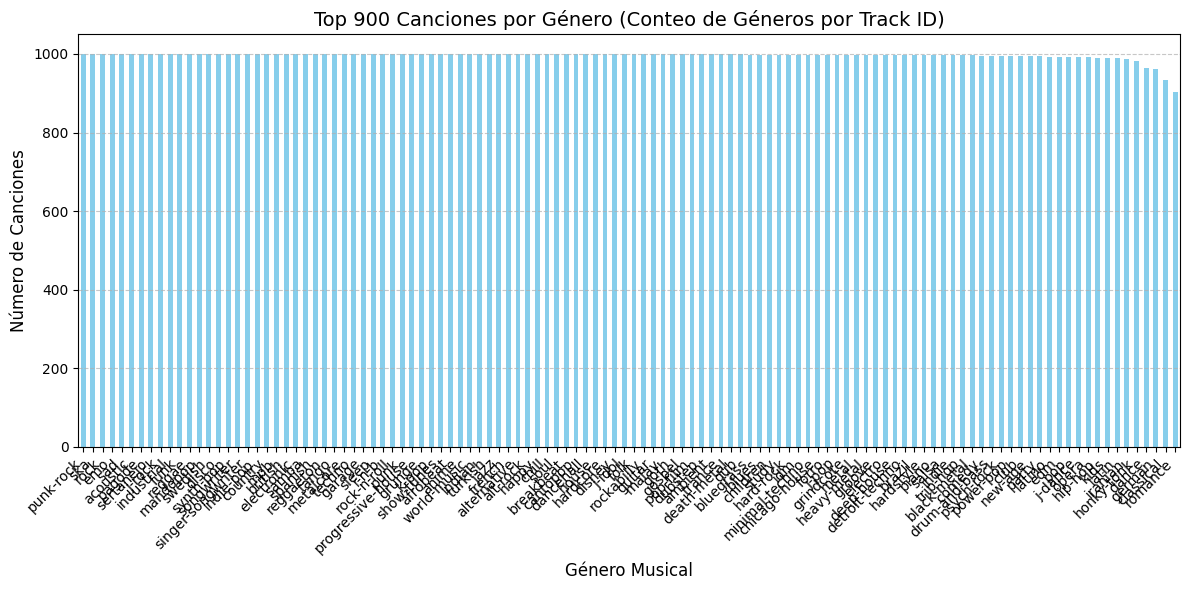

In [54]:
# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Graficar el conteo de géneros
genero_counts_top.plot(kind='bar', color='skyblue')

# Añadir títulos y etiquetas
plt.title(f'Top {top_n} Canciones por Género (Conteo de Géneros por Track ID)', fontsize=14)
plt.xlabel('Género Musical', fontsize=12)
plt.ylabel('Número de Canciones', fontsize=12)

# Rotar las etiquetas del eje X para que sean legibles
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta el layout para que no se corten las etiquetas
plt.show()

In [56]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Necesitarás instalar esta librería: pip install wordcloud

# Asumiendo que tu DataFrame final se llama df_clean
# df_clean = pd.read_csv("data/spotify_clean_final.csv") # Descomenta si necesitas cargarlo

# a. Decodificar la columna JSON
df_clean['generos_lista'] = df_clean['track_genre'].apply(lambda x: json.loads(x) if isinstance(x, str) else [])

# b. Unir todos los géneros en una sola cadena de texto
# Esto crea una cadena masiva donde cada género es una "palabra"
text_content = ' '.join([' '.join(lista) for lista in df_clean['generos_lista']])

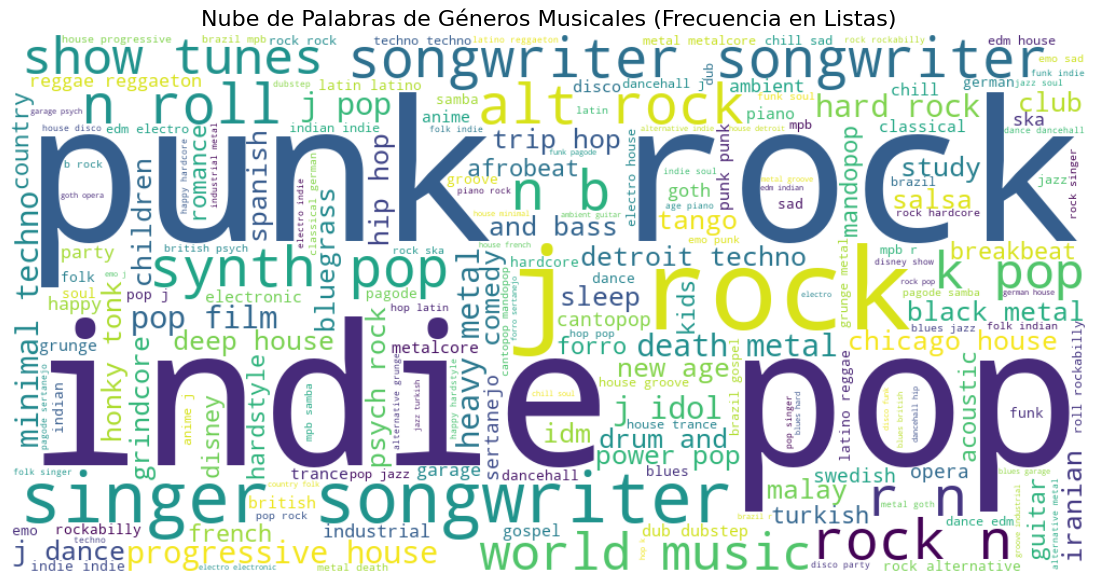

In [60]:
# Crear la Nube de Palabras
wordcloud = WordCloud(
    width=1000, 
    height=500, 
    background_color='white', 
    colormap='viridis', # Un esquema de colores agradable
    # Se eliminan palabras comunes que podrían ser ruido (si las hubiera)
    stopwords=set(['nan', 'unknown', 'none']) 
).generate(text_content)

# Mostrar la gráfica
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras de Géneros Musicales (Frecuencia en Listas)', fontsize=16)
plt.show()

In [61]:
import pandas as pd
import json
import plotly.express as px

# Asumiendo que tu DataFrame final se llama df_clean
# df_clean = pd.read_csv("data/spotify_clean_final.csv") # Descomenta si necesitas cargarlo

# a. Decodificar la columna JSON
df_clean['generos_lista'] = df_clean['track_genre'].apply(lambda x: json.loads(x) if isinstance(x, str) else [])

# b. Desanidar la lista de géneros y contar
df_exploded = df_clean.explode('generos_lista')
genero_counts = df_exploded['generos_lista'].value_counts().reset_index()
genero_counts.columns = ['genero', 'conteo']

# c. Tomar solo el TOP 30 (para que el Treemap sea legible)
genero_counts_top = genero_counts.head(30)

In [67]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


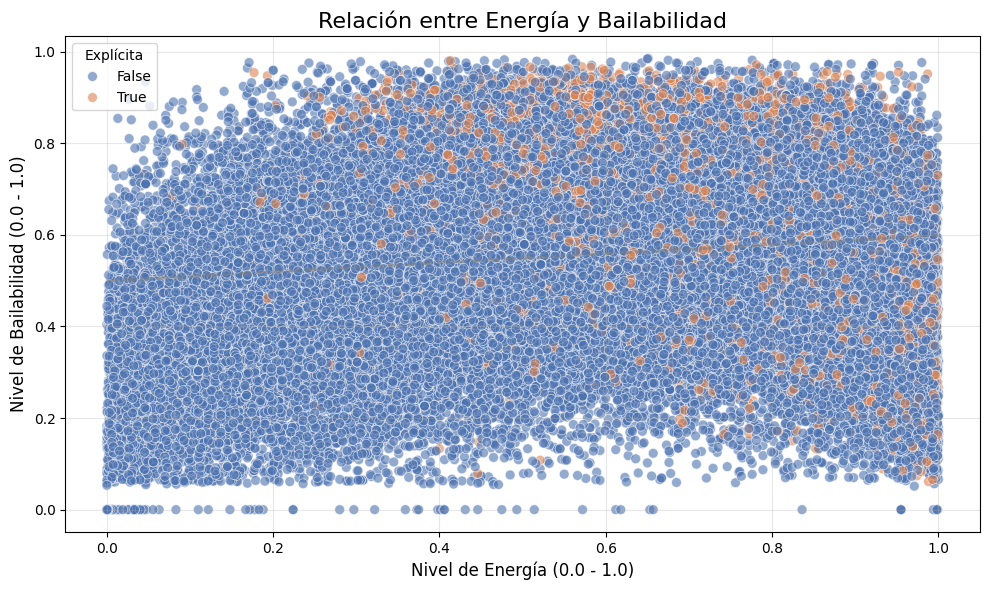

In [68]:
import seaborn as sns # Seaborn facilita las visualizaciones de dispersión
import matplotlib.pyplot as plt

# Asumiendo que tu DataFrame limpio se llama df_clean

plt.figure(figsize=(10, 6))

# Crear el diagrama de dispersión usando Seaborn
sns.scatterplot(
    x='energy', 
    y='danceability', 
    data=df_clean, 
    hue='explicit', # Usamos 'explicit' como una categoría de color sencilla
    palette='deep',
    alpha=0.6,
    s=50 # Tamaño de los puntos
)

# Añadir una línea de regresión para ver la tendencia general
sns.regplot(x='energy', y='danceability', data=df_clean, scatter=False, color='gray', line_kws={'linestyle':'--', 'alpha':0.5})


plt.title('Relación entre Energía y Bailabilidad', fontsize=16)
plt.xlabel('Nivel de Energía (0.0 - 1.0)', fontsize=12)
plt.ylabel('Nivel de Bailabilidad (0.0 - 1.0)', fontsize=12)
plt.legend(title='Explícita')
plt.grid(axis='both', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\ruizt\AppData\Local\Temp\ipykernel_34832\3788177009.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




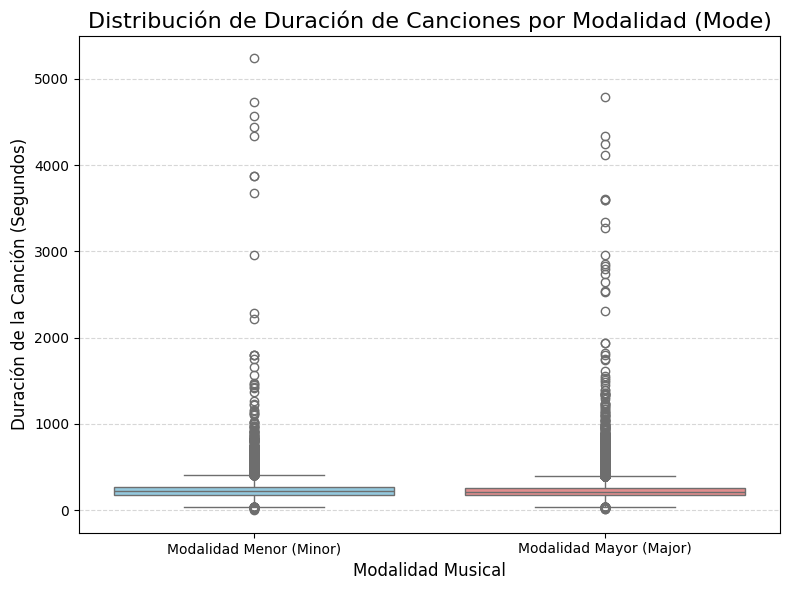

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_clean['duration_sec'] = df_clean['duration_ms'] / 1000

plt.figure(figsize=(8, 6))

# Usamos Seaborn para crear el Box Plot
sns.boxplot(
    x='mode', 
    y='duration_sec', 
    data=df_clean, 
    palette=['skyblue', 'lightcoral']
)


plt.xticks([0, 1], ['Modalidad Menor (Minor)', 'Modalidad Mayor (Major)'])

plt.title('Distribución de Duración de Canciones por Modalidad (Mode)', fontsize=16)
plt.xlabel('Modalidad Musical', fontsize=12)
plt.ylabel('Duración de la Canción (Segundos)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

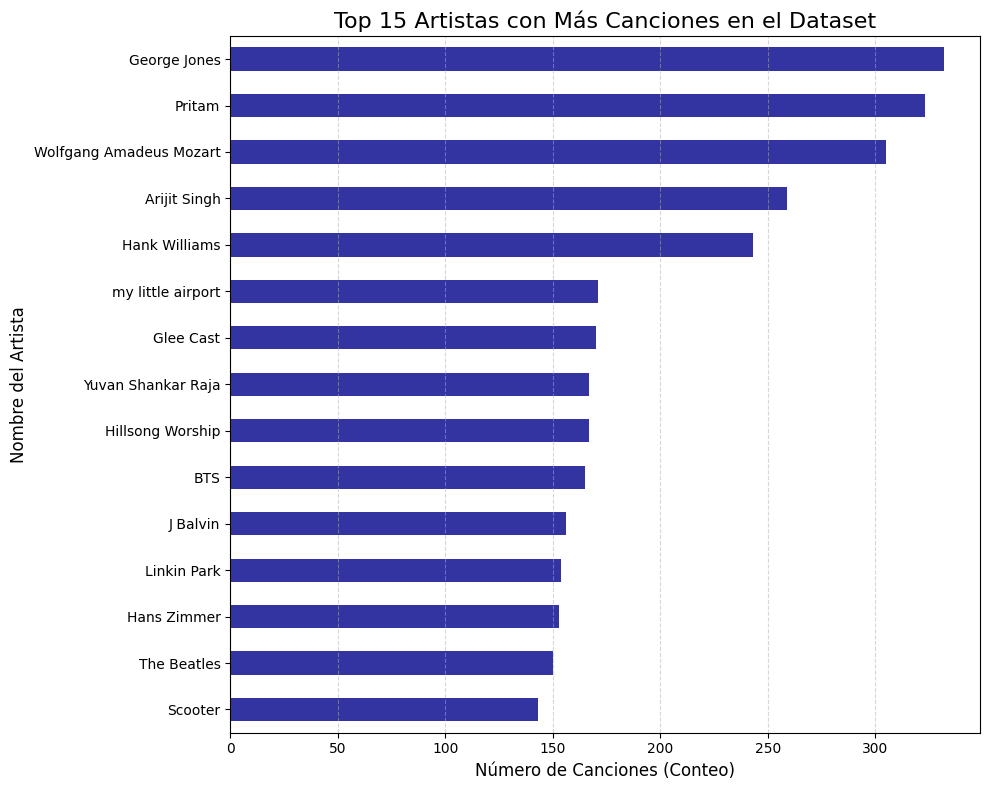

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que tu DataFrame limpio se llama df_clean

# 1. Limpiar y desanidar la columna de artistas (asumiendo que está en formato string separado por comas o punto y coma)
# Si la columna 'artists' contiene múltiples artistas separados por ';', ajustamos el split aquí.
# Si solo tiene un artista por entrada, esto es directo:
if df_clean['artists'].dtype == 'object' and df_clean['artists'].str.contains(';').any():
    artists_series = df_clean['artists'].astype(str).str.split(';').explode()
else:
    artists_series = df_clean['artists'].astype(str)

# Limpiar espacios y contar
artist_counts = artists_series.str.strip().value_counts()

# 2. Tomar el TOP 15 de artistas (para que la gráfica sea legible)
top_artists = artist_counts.head(15).sort_values(ascending=True)

# --- Gráfica ---
plt.figure(figsize=(10, 8))

# Crear la gráfica de barras horizontal
top_artists.plot(kind='barh', color='darkblue', alpha=0.8)

plt.title(f'Top {len(top_artists)} Artistas con Más Canciones en el Dataset', fontsize=16)
plt.xlabel('Número de Canciones (Conteo)', fontsize=12)
plt.ylabel('Nombre del Artista', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

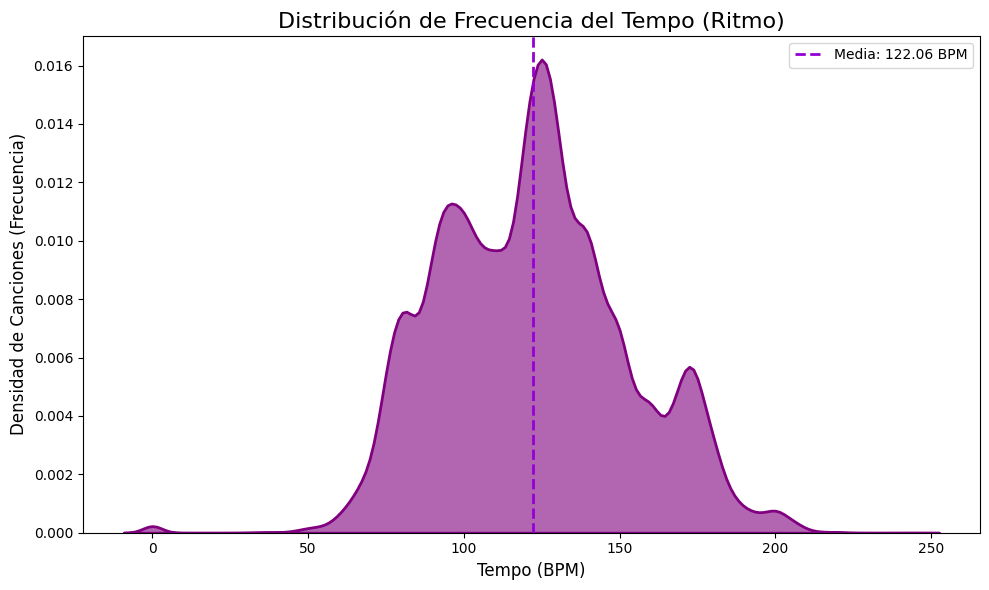

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tu DataFrame limpio se llama df_clean

plt.figure(figsize=(10, 6))

# Usamos Seaborn para el KDE Plot
sns.kdeplot(
    df_clean['tempo'], 
    fill=True, 
    color='purple', 
    alpha=0.6,
    linewidth=2
)

# Calcular y mostrar el Tempo Promedio
media_tempo = df_clean['tempo'].mean()
plt.axvline(media_tempo, color='darkviolet', linestyle='dashed', linewidth=2, label=f'Media: {media_tempo:.2f} BPM')


plt.title('Distribución de Frecuencia del Tempo (Ritmo)', fontsize=16)
plt.xlabel('Tempo (BPM)', fontsize=12)
plt.ylabel('Densidad de Canciones (Frecuencia)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\ruizt\AppData\Local\Temp\ipykernel_34832\3598736339.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




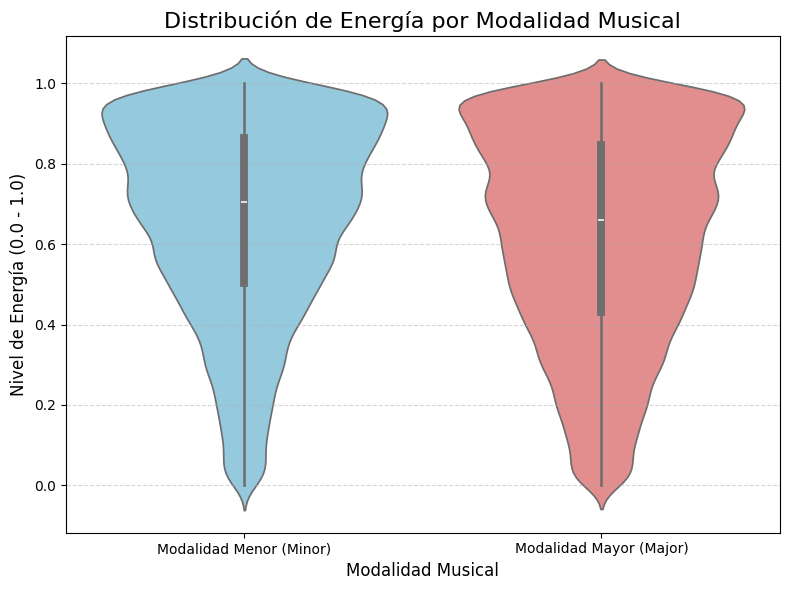

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tu DataFrame limpio se llama df_clean

plt.figure(figsize=(8, 6))

# Creamos el Violin Plot
sns.violinplot(
    x='mode', 
    y='energy', 
    data=df_clean, 
    palette=['skyblue', 'lightcoral']
)

# Cambiar las etiquetas del eje X (0: Menor, 1: Mayor)
plt.xticks([0, 1], ['Modalidad Menor (Minor)', 'Modalidad Mayor (Major)'])

plt.title('Distribución de Energía por Modalidad Musical', fontsize=16)
plt.xlabel('Modalidad Musical', fontsize=12)
plt.ylabel('Nivel de Energía (0.0 - 1.0)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

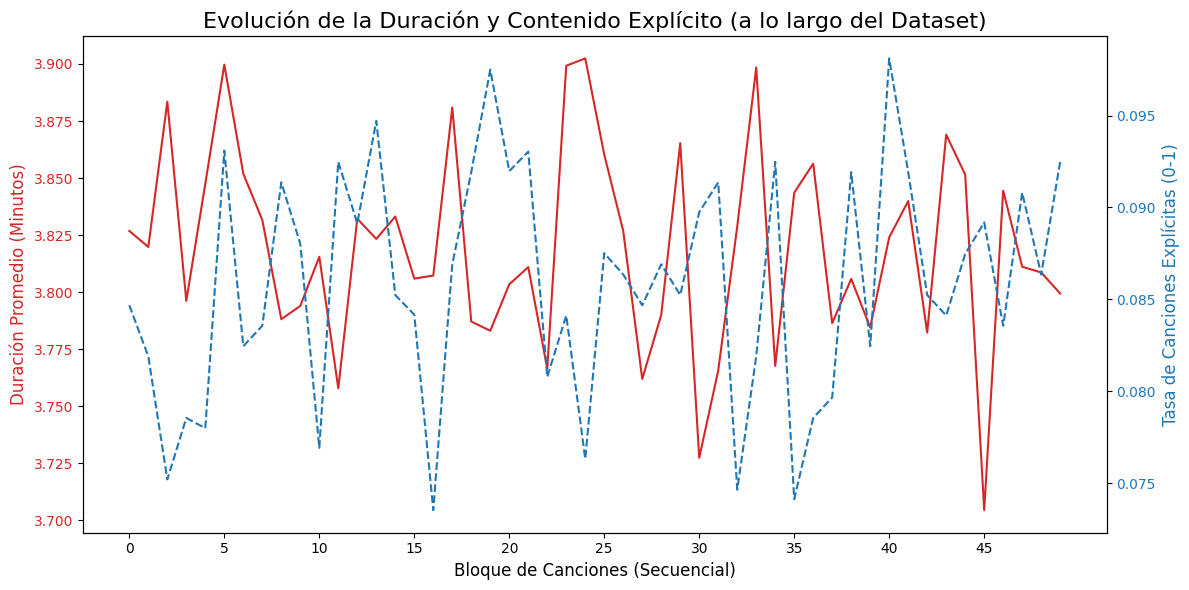

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tu DataFrame limpio se llama df_clean

# 1. Crear una columna de 'Bloque de Tiempo' o 'Grupo'
# Dividimos el dataset en 50 grupos secuenciales (por el orden de aparición/índice)
num_groups = 50
df_clean['time_group'] = pd.cut(df_clean.index, bins=num_groups, labels=False, include_lowest=True)

# 2. Calcular las métricas por grupo
# Duración promedio (en minutos) y porcentaje de canciones explícitas
temporal_kpis = df_clean.groupby('time_group').agg(
    avg_duration_min=('duration_ms', lambda x: (x / 60000).mean()),
    explicit_rate=('explicit', 'mean') # mean() de 0s y 1s da el porcentaje (tasa)
).reset_index()

# --- Gráfica ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfica de Línea para Duración (Eje Y Izquierdo)
color_dur = 'tab:red'
ax1.set_xlabel('Bloque de Canciones (Secuencial)', fontsize=12)
ax1.set_ylabel('Duración Promedio (Minutos)', color=color_dur, fontsize=12)
ax1.plot(temporal_kpis['time_group'], temporal_kpis['avg_duration_min'], color=color_dur, label='Duración Promedio')
ax1.tick_params(axis='y', labelcolor=color_dur)
ax1.set_xticks(temporal_kpis['time_group'][::5]) # Mostrar menos ticks

# Crear un segundo eje Y para el porcentaje Explícito
ax2 = ax1.twinx()  
color_exp = 'tab:blue'
ax2.set_ylabel('Tasa de Canciones Explícitas (0-1)', color=color_exp, fontsize=12)
ax2.plot(temporal_kpis['time_group'], temporal_kpis['explicit_rate'], color=color_exp, linestyle='--', label='Tasa Explícita')
ax2.tick_params(axis='y', labelcolor=color_exp)

plt.title('Evolución de la Duración y Contenido Explícito (a lo largo del Dataset)', fontsize=16)
fig.tight_layout()
plt.show()

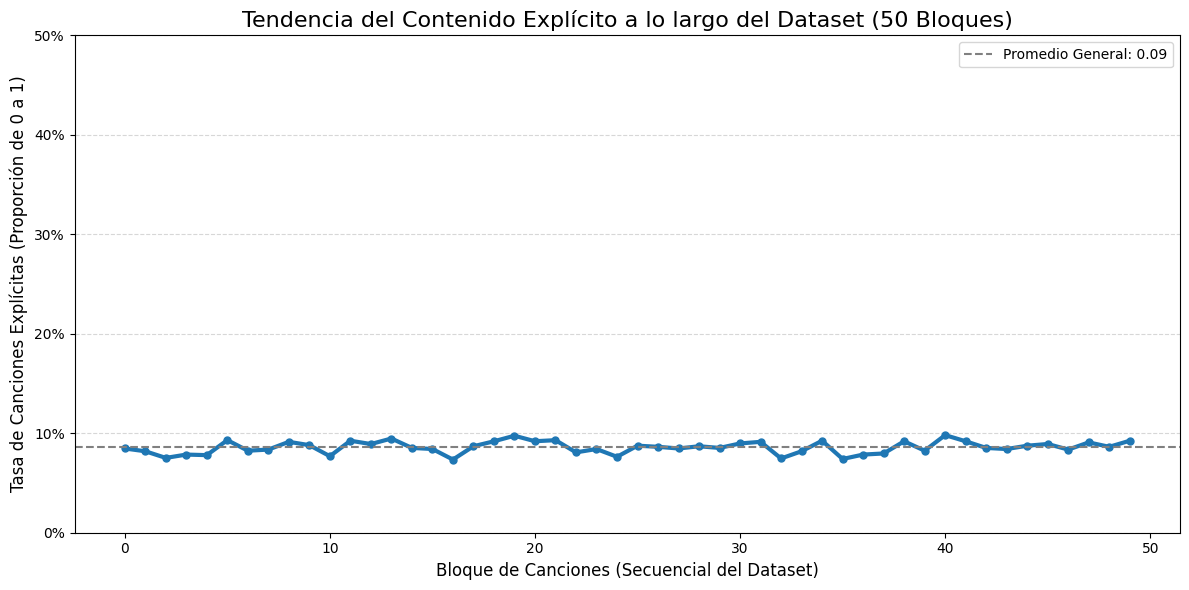

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tu DataFrame limpio se llama df_clean

# 1. Crear una columna de 'Bloque de Tiempo' o 'Grupo'
# Dividimos el dataset en 50 grupos secuenciales (ajusta el número si tienes más o menos datos)
num_groups = 50 
df_clean['time_group'] = pd.cut(df_clean.index, bins=num_groups, labels=False, include_lowest=True)

# 2. Calcular la Tasa Explícita por grupo
# La media de la columna 'explicit' (donde 1 es Explícita y 0 es No explícita) es la tasa/porcentaje.
temporal_kpis = df_clean.groupby('time_group')['explicit'].mean().reset_index()
temporal_kpis.columns = ['time_group', 'explicit_rate']


# --- Gráfica ---
plt.figure(figsize=(12, 6))

# Gráfico de Línea para la Tasa Explícita
plt.plot(
    temporal_kpis['time_group'], 
    temporal_kpis['explicit_rate'], 
    color='tab:blue', 
    linewidth=3, 
    marker='o', 
    markersize=5
)

plt.title(f'Tendencia del Contenido Explícito a lo largo del Dataset ({num_groups} Bloques)', fontsize=16)
plt.xlabel('Bloque de Canciones (Secuencial del Dataset)', fontsize=12)
plt.ylabel('Tasa de Canciones Explícitas (Proporción de 0 a 1)', fontsize=12)

# Formato del eje Y para que se vea como porcentaje (opcional)
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5], ['0%', '10%', '20%', '30%', '40%', '50%'])

# Añadir una línea de promedio general
avg_explicit_rate = df_clean['explicit'].mean()
plt.axhline(avg_explicit_rate, color='gray', linestyle='--', label=f'Promedio General: {avg_explicit_rate:.2f}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

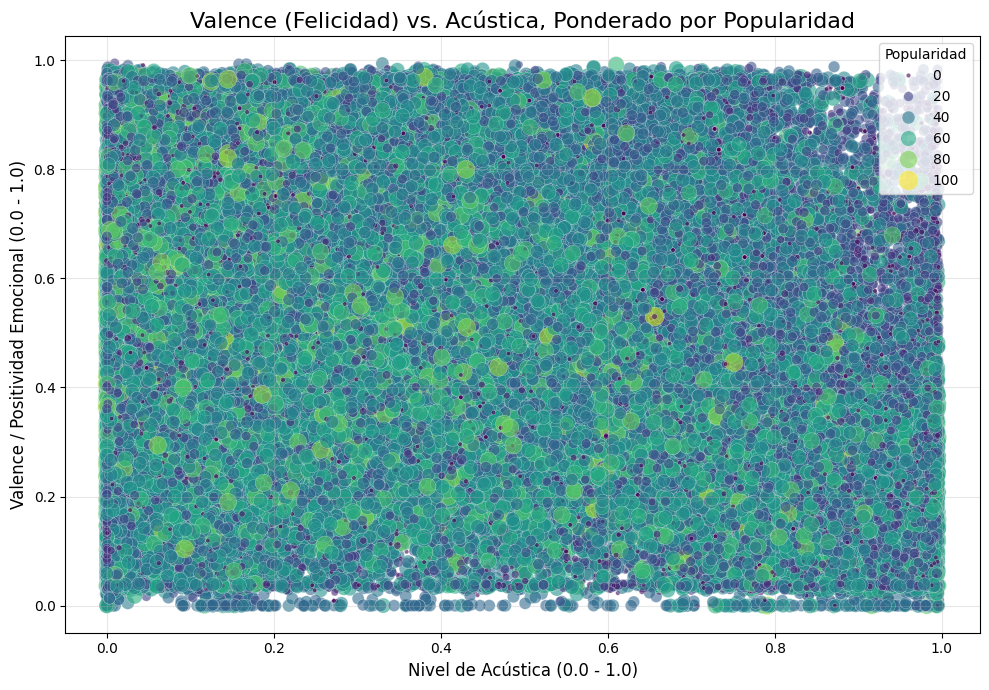

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tu DataFrame limpio se llama df_clean

plt.figure(figsize=(10, 7))

# Usamos Seaborn para crear el Scatter Plot (Diagrama de Dispersión)
sns.scatterplot(
    x='acousticness', 
    y='valence', 
    data=df_clean, 
    hue='popularity', # El color representa la Popularidad
    size='popularity', # El tamaño del punto también representa la Popularidad
    palette='viridis', # Un esquema de color degradado
    sizes=(10, 200), # Rango de tamaño de los puntos
    alpha=0.6
)

plt.title('Valence (Felicidad) vs. Acústica, Ponderado por Popularidad', fontsize=16)
plt.xlabel('Nivel de Acústica (0.0 - 1.0)', fontsize=12)
plt.ylabel('Valence / Positividad Emocional (0.0 - 1.0)', fontsize=12)
plt.legend(title='Popularidad', loc='upper right')
plt.grid(axis='both', alpha=0.3)
plt.tight_layout()
plt.show()

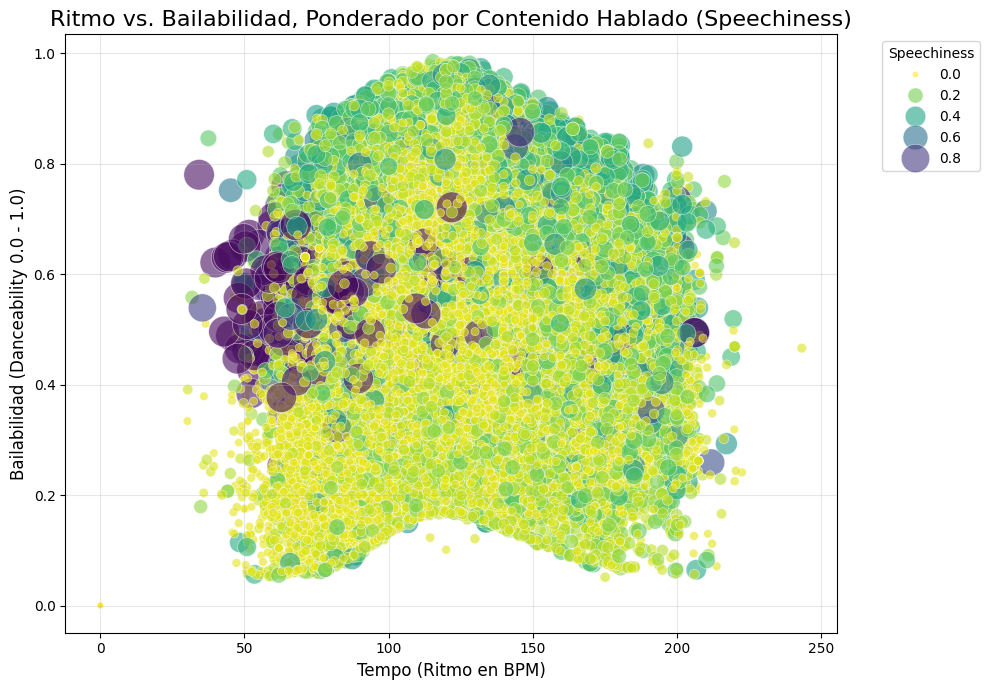

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tu DataFrame limpio se llama df_clean

plt.figure(figsize=(10, 7))

# Crear el gráfico de dispersión (Scatter Plot)
# Asignamos:
# Eje X: Tempo (Ritmo)
# Eje Y: Danceability (Bailabilidad)
# Talla (Tamaño del punto): Speechiness (Palabras habladas)
sns.scatterplot(
    x='tempo', 
    y='danceability', 
    data=df_clean, 
    size='speechiness', 
    hue='speechiness', # Color basado en Speechiness para reforzar la visualización
    palette='viridis_r', # Un esquema de color que resalta la diferencia
    sizes=(20, 500), # Rango de tamaño de las burbujas
    alpha=0.6
)

plt.title('Ritmo vs. Bailabilidad, Ponderado por Contenido Hablado (Speechiness)', fontsize=16)
plt.xlabel('Tempo (Ritmo en BPM)', fontsize=12)
plt.ylabel('Bailabilidad (Danceability 0.0 - 1.0)', fontsize=12)

# Mover la leyenda a la derecha para no obstruir los puntos
plt.legend(title='Speechiness', bbox_to_anchor=(1.05, 1), loc=2) 
plt.grid(axis='both', alpha=0.3)
plt.tight_layout()
plt.show()